In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import OperationalError
import seaborn as sns

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

In [46]:
# 1. Database Connection
# If the path fails, try 'databases/nhanes_1st.db' instead of '../databases/nhanes_1st.db'
DB_FILE_PATH = '../databases/nhanes_1st.db' 
conn = sqlite3.connect(DB_FILE_PATH)

# 2. Loading Data into the 'df' Variable
try:
    # Querying the merged dataset
    df = pd.read_sql_query('SELECT * FROM "raw_dataset"', conn)
    
    print("✅ Data successfully loaded into 'df'.")
    print(f"Total Records: {len(df)}")
    print(f"Total Features: {df.shape[1]}")
    
    # Configure default plotting settings
    sns.set_theme(style="whitegrid")
    
except Exception as e:
    print(f"❌ Error during data loading: {e}")

# Display the first few rows to verify content
# df.head()

✅ Data successfully loaded into 'df'.
Total Records: 56893
Total Features: 29


## Bivariate Analysis &          Comparative Plots

--- 2.1 Distribution of Clinical Features by CVD Status ---


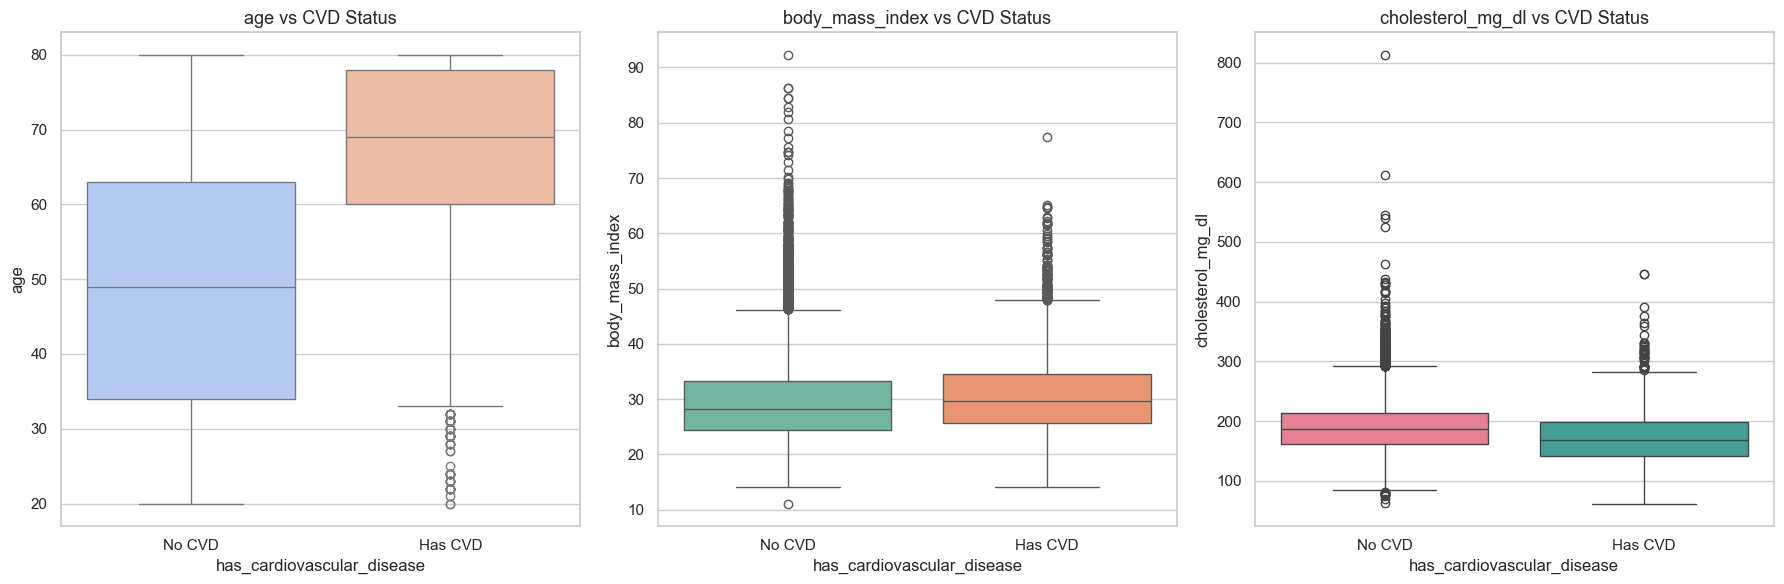


--- 2.2 Smoking Status & CVD Incidence Rate ---


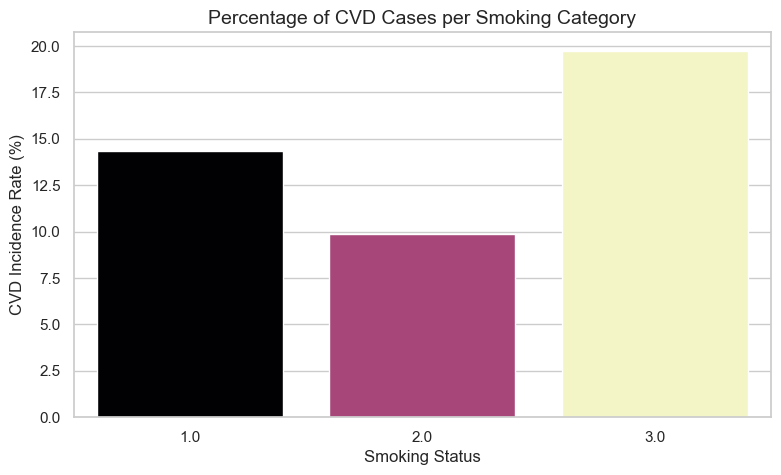


--- 2.3 Feature Correlation Heatmap ---


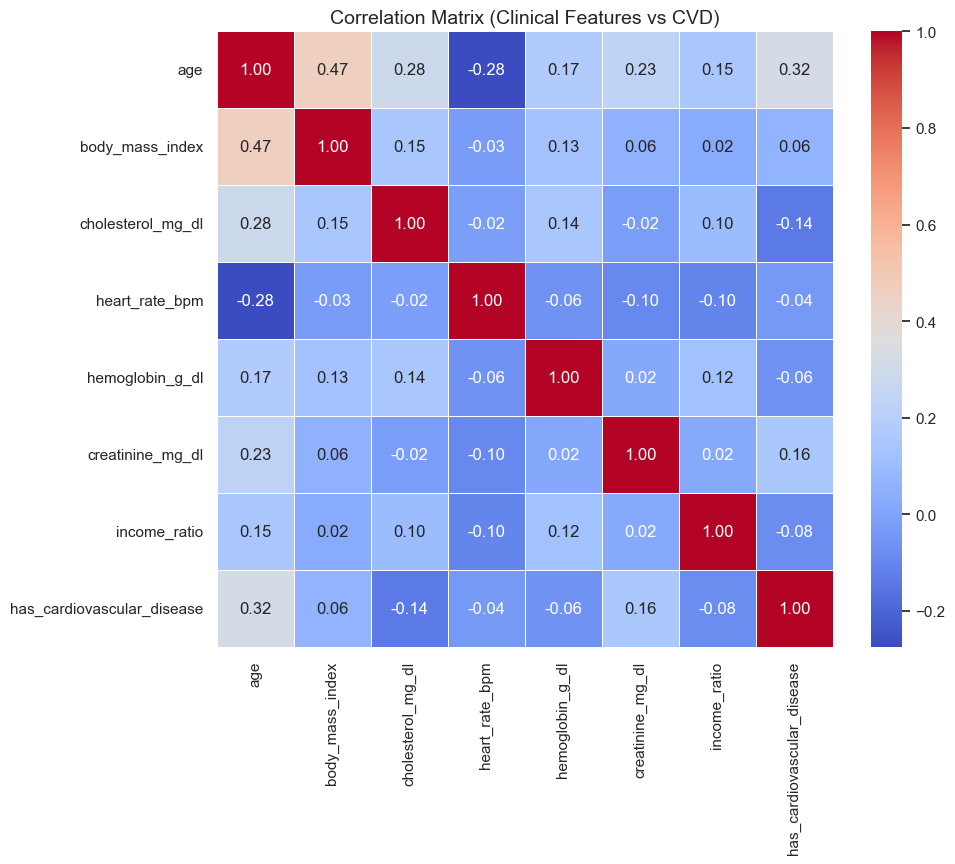

In [47]:
# =========================================================
# 2. Bivariate Analysis (Relationship with CVD)
# =========================================================

# 2.1 Clinical Features vs Target (Age, BMI, & Cholesterol)
# Here we compare the distribution of 3 key features against CVD status
print("--- 2.1 Distribution of Clinical Features by CVD Status ---")
plt.figure(figsize=(18, 6))

features_to_plot = ['age', 'body_mass_index', 'cholesterol_mg_dl']
colors = ['coolwarm', 'Set2', 'husl']

for i, col in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        x='has_cardiovascular_disease', 
        y=col, 
        data=df, 
        palette=colors[i],
        hue='has_cardiovascular_disease',
        legend=False
    )
    plt.title(f'{col} vs CVD Status', fontsize=13)
    plt.xticks([0, 1], ['No CVD', 'Has CVD'])

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 2.2 Impact of Lifestyle (Smoking Status) on CVD Rate
# ---------------------------------------------------------
print("\n--- 2.2 Smoking Status & CVD Incidence Rate ---")
# Calculating the percentage and sorting for better visualization
smoking_impact = df.groupby('smoking_status')['has_cardiovascular_disease'].mean().mul(100).sort_values(ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(
    x=smoking_impact.index, 
    y=smoking_impact.values, 
    palette='magma',
    hue=smoking_impact.index,
    legend=False
)
plt.ylabel('CVD Incidence Rate (%)')
plt.xlabel('Smoking Status')
plt.title('Percentage of CVD Cases per Smoking Category', fontsize=14)
plt.show()

# ---------------------------------------------------------
# 2.3 Comprehensive Correlation Heatmap
# ---------------------------------------------------------
print("\n--- 2.3 Feature Correlation Heatmap ---")
# Selecting specific clinical columns to keep the heatmap readable
corr_features = [
    'age', 'body_mass_index', 'cholesterol_mg_dl', 'heart_rate_bpm', 
    'hemoglobin_g_dl', 'creatinine_mg_dl', 'income_ratio', 'has_cardiovascular_disease'
]

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[corr_features].corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5,
    square=True
)
plt.title('Correlation Matrix (Clinical Features vs CVD)', fontsize=14)
plt.show()

Correlation Matrix & Heatmap

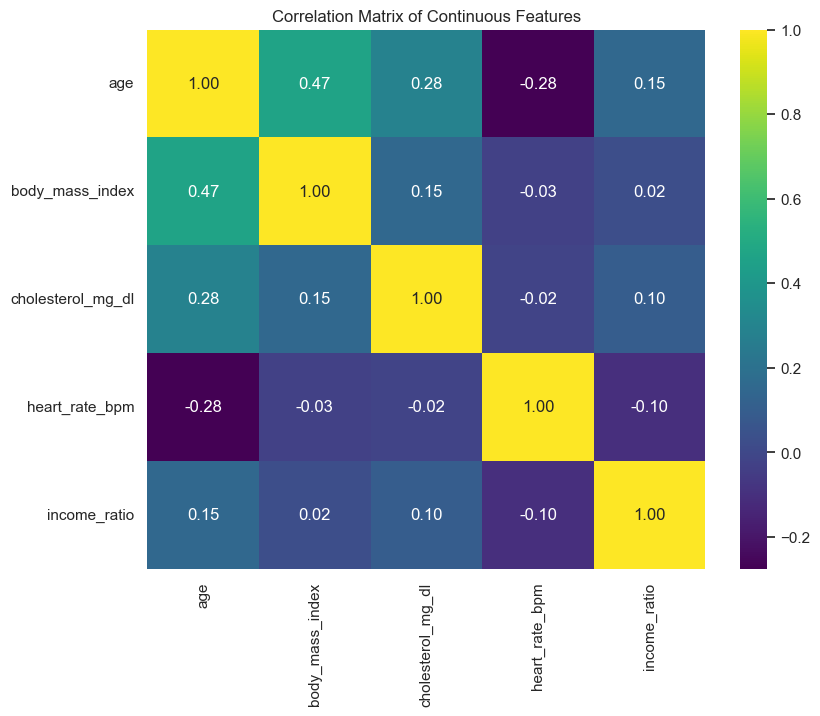

In [48]:
corr_cols = ['age', 'body_mass_index', 'cholesterol_mg_dl', 'heart_rate_bpm', 'income_ratio']
plt.figure(figsize=(9, 7))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()